<a href="https://www.oguzerdogan.com/">
    <img src="https://www.oguzerdogan.com/wp-content/uploads/2020/10/logo_oz.png" width="200" align="right">
</a>

<center><h1><strong>Pima Indians Diabetes Classification Project</strong></h1>
<img
src="https://cdn.britannica.com/s:700x500/42/93542-050-E2B32DAB/women-Pima-shinny-game-field-hockey.jpg">
</center>

# &#127919; Objective of Kernel

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are **females at least 21 years old of Pima Indian heritage.**

--------------------

**Details about the dataset:**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Pregnancies:** Number of times pregnant  
**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
**BloodPressure:** Diastolic blood pressure (mm Hg)  
**SkinThickness:** Triceps skin fold thickness (mm)  
**Insulin:** 2-Hour serum insulin (mu U/ml)  
**BMI:** Body mass index (weight in kg/(height in m)^2)  
**DiabetesPedigreeFunction:** Diabetes pedigree function  
**Age:** Age (years)  
**Outcome:** Class variable ( 0 - 1)

-----------

**Number of Observation Units:** 768  
**Variable Number:** 9

Result; The model with the highest score after hyper parameter optimization was LGBM with 0.90 cross validation score.

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #C20E69; font-family: 'Poppins'} 
h2, h3 {color: #25B89B; font-family: 'Poppins';}
h4 {color: #818286; font-family: 'Roboto';}
                                      
</style>

# &#128217; Load Libraries

In [2]:
# Main

import pandas as pd
import numpy as np
import warnings

# Plots

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
import itertools
plt.style.use('fivethirtyeight')
py.offline.init_notebook_mode(connected=True)

# Models & Others

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
warnings.simplefilter(action="ignore")


# &#128214; Read Data

In [3]:
df = pd.read_csv(r"../input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## &#128270; Descriptive Statistics

In [4]:
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


<div class="alert alert-block alert-info" style="margin-top: 20px">

<ul>
<li><strong>pregnancies</strong> mean &gt; median, <strong>right skewed</strong> | <strong>99% quartile value:</strong> 13, <strong>max value:</strong> 17 <strong>might be outlier</strong></li>
<li><strong>glucose</strong> mean &gt; median, <strong>right skewed</strong> | <strong>%99</strong> and <strong>max</strong> values close each other</li>
<li><strong>bloodpressure</strong> mean = median nearly, looks <strong>gaussian distribution</strong>. There is a 16 units difference between <strong>%99</strong> and <strong>max value. might be outlier</strong></li>
<li><strong>skinthickness</strong> mean &gt; median, <strong>right skewed</strong> | <strong>min value:</strong> 0 | <strong>99% quartile value:</strong> 51 <strong>max value:</strong> 99 <strong>there is outlier</strong></li>
<li><strong>insulin</strong> mean(79) &gt; median(30), <strong>right skewed</strong> | <strong>min value:</strong> 0, <strong>99% quartile value:</strong> 519 <strong>max value:</strong> 846</li>
<li><strong>BMI</strong> mean(31) =~ median(32), looks <strong>gaussian distribution</strong> | <strong>min value:</strong> 0 | <strong>99% quartile value:</strong> 50, <strong>max value:</strong> 67</li>
<li><strong>DPF</strong> mean(0.47) &gt; median (0.37) | <strong>min value:</strong> 0.078 | <strong>99% quartile value:</strong> 1.69 <strong>max value:</strong> 2.42</li>
<li><strong>Age</strong> mean(33)&gt;median(29) <strong>right skewed</strong> | <strong>min value:</strong> 21 | <strong>99% quartile value:</strong> 67 <strong>max value:</strong> 2.42</li>

</ul>

</div>

In [5]:
# Data Shape
print("There are {} observation and {} features ".format(df.shape[0], df.shape[1]))

There are 768 observation and 9 features 


## &#128918; Target Variable Counts

In [6]:
#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = df['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=df['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=20),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['#25B89B', '#C20E69'],
                    line=dict(color='#FFFFFF',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
target_count()

## &#9703; Categorical & Numerical Columns

In [7]:
def cols():
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    if len(cat_cols) == 0:
        print("There is not Categorical Column")
    else:
        print("Number of Categorical Column: ", len(cat_cols),"\n",cat_cols)
    
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    if len(num_cols) == 0:
        print("There is not Numerical Column")
    print("Number of Numerical Columns: ", len(num_cols),"\n",num_cols)
cols()

There is not Categorical Column
Number of Numerical Columns:  9 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


# &#128270; Missing Values

<div class="alert alert-danger" role="alert">
    In this data set <b>NA</b> are filled with 0
</div>

In [8]:
# Missing Values Table Function
def missing_values_table(dataframe):
    
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    dtypes = dataframe.dtypes
    dtypesna = dtypes.loc[(np.sum(dataframe.isnull()) != 0)]
    missing_df = pd.concat([n_miss, np.round(ratio, 2), dtypesna], axis=1, keys=['n_miss', 'ratio', 'type'])
    if len(missing_df)>0:
        print(missing_df)
        print("\nThere are {} columns with missing values\n".format(len(missing_df)))
    else:
        print("\nThere is no missing value") 



In [9]:
missing_values_table(df)


There is no missing value


In [10]:
# This features can not be 0!
missing = ["Glucose", "BMI", "BloodPressure", "SkinThickness", "Insulin"]

for i in missing:
    df[i] = np.where(df[i] == 0, np.nan, df[i])

In [11]:
missing_values_table(df)

               n_miss  ratio     type
Insulin           374  48.70  float64
SkinThickness     227  29.56  float64
BloodPressure      35   4.56  float64
BMI                11   1.43  float64
Glucose             5   0.65  float64

There are 5 columns with missing values



## &#9850; Filling NA Values

In [12]:
#The missing values will be filled with the median values of each variable
def median_target(variable):   
    temp = df[df[variable].notnull()]
    temp = temp[[variable, 'Outcome']].groupby(['Outcome'])[[variable]].median().reset_index()
    return temp

In [13]:
#The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [14]:
missing_values_table(df)


There is no missing value


-----------------

# &#128202; Exploratory Data Analysis

## Histogram

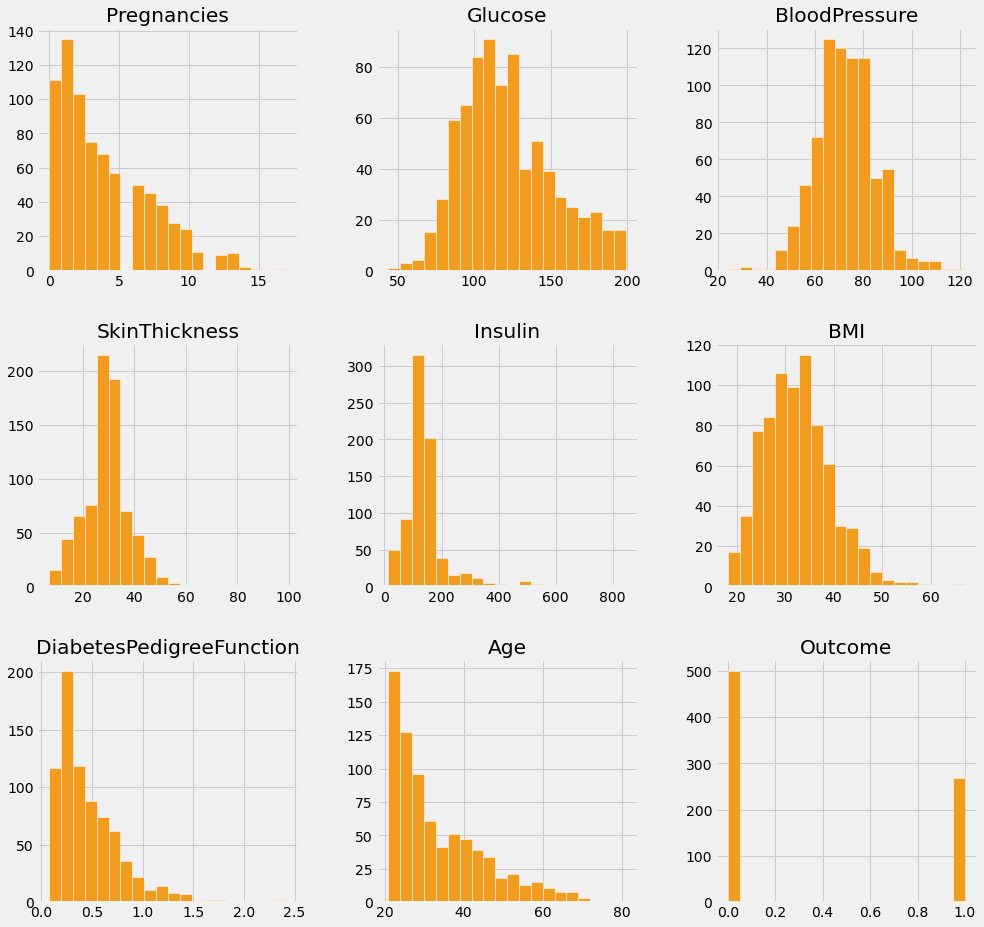

In [15]:
df.hist(bins=20,color = "#F19C1F",edgecolor='white',figsize = (15,15));

## Correlation Between Features

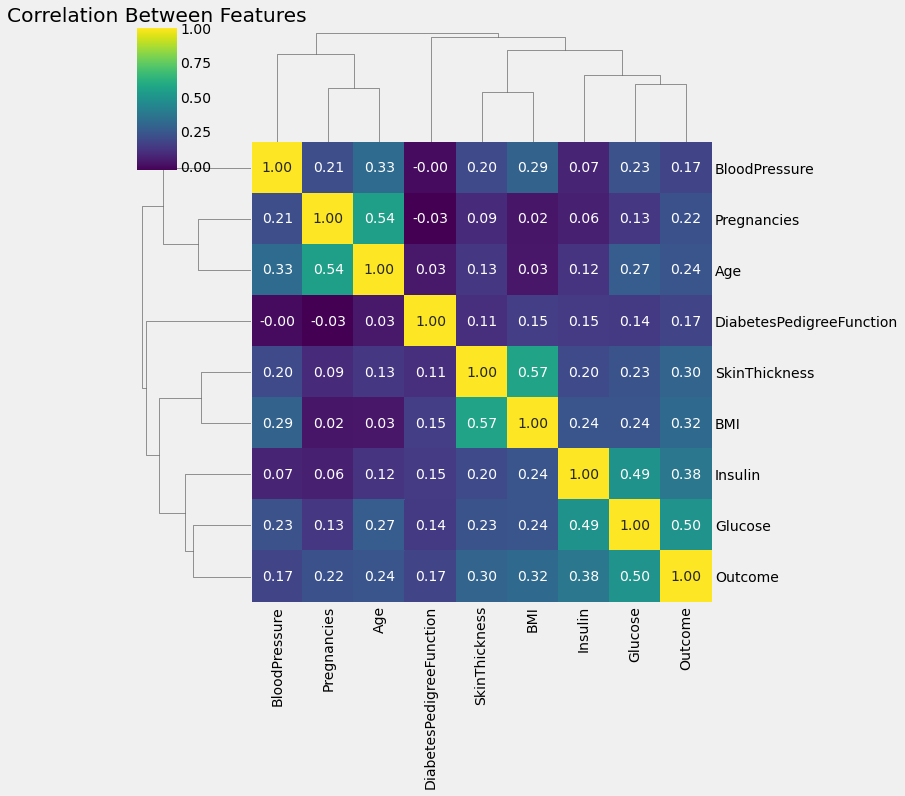

In [16]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", cmap = "viridis", figsize=(11,11))
plt.title("Correlation Between Features")
plt.show()

-------------------
# &#9823; Base Models | LightGBM

In [17]:
# Split X and y
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [18]:
log_model = LogisticRegression().fit(X,y)
y_pred = log_model.predict(X)
print("Accuracy Score:", accuracy_score(y, y_pred), "\n")
print(classification_report(y,y_pred))

Accuracy Score: 0.7799479166666666 

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       500
           1       0.73      0.59      0.65       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768



In [19]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM',GradientBoostingClassifier()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.773445 (0.034015)
KNN: 0.850239 (0.022081)
CART: 0.846429 (0.034558)
RF: 0.878930 (0.041453)
GBM: 0.881596 (0.025986)
XGB: 0.881596 (0.025986)
LightGBM: 0.882878 (0.022241)


## &#128202; Base Model: LightGBM Feature Importance

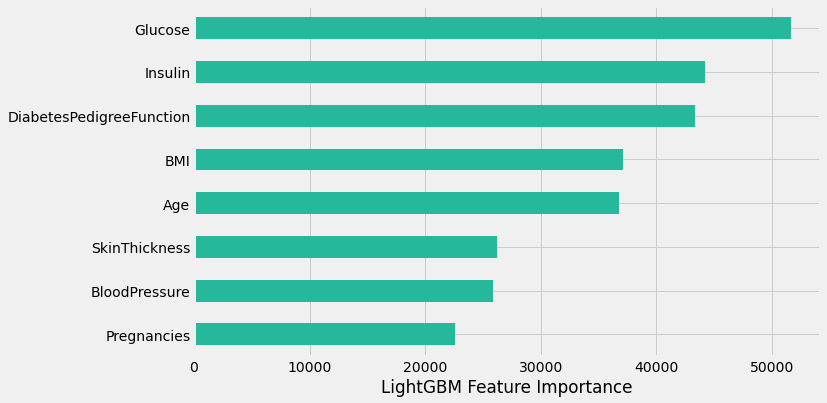

In [20]:
Importance = pd.DataFrame({'Importance':LGBMClassifier().fit(X, y).feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = '#25B89B', figsize=(10,6))

plt.xlabel('LightGBM Feature Importance')
plt.gca().legend_ = None

--------------------------
# &#128296; Feature Engineering


## Outliers

In [21]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

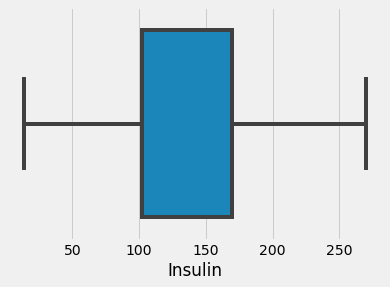

In [22]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

## New Features

In [23]:
# According to feature importance i'm creating new features.
df2 = df.copy()

df2["Insulin/Age"]=df2["Insulin"]/df2["Age"]
df2["BMI/Age"]=df2["BMI"]/df2["Age"]
df2["Pregnancies/Age"]=df2["Pregnancies"]/df2["Age"]
df2["Ins*Glu"]=df2["Insulin"]* df2["Glucose"]
df2.drop(["Age"],axis = 1, inplace = True)

## Edit Features

### - BMI Levels

<center><img
src="https://www.oguzerdogan.com/wp-content/uploads/2020/10/BMI.jpg">
</center>

In [24]:
df2['New_BMI'] = pd.cut(x = df['BMI'], bins = [0,18.5, 24.9, 29.9, 100], labels = ["Underweight", 
                                                                                  "NormalWeight", 
                                                                                  "Overweight", 
                                                                                  "Obes"])

### - Blood Pressure Levels

<center><img
src="https://www.oguzerdogan.com/wp-content/uploads/2020/10/blood.jpg">
</center>



In [25]:
df2['New_BloodPressure'] = pd.cut(x = df['BloodPressure'], bins = [0,80, 90, 120, 122], labels = ["Normal", 
                                                                                                "Hyper_St1", 
                                                                                                "Hyper_St2", 
                                                                                                "Hyper_Emer"])
#reference: American Heart Association

### - Glucose Levels

<center><img
src="https://www.oguzerdogan.com/wp-content/uploads/2020/10/glucose.jpg">
</center>

In [26]:
df2["New_Glucose"] = pd.cut(x = df["Glucose"], bins = [0,140,200,300], labels = ["Normal",
                                                                                "Prediabetes",
                                                                                "Diabetes"])
#reference: https://emedicine.medscape.com/article/2049402-overview

### - Insulin Levels

In [27]:
#A categorical variable creation process is performed according to the insulin value.
def set_insulin(row): 
    if row["Insulin"] >= 100 and row["Insulin"] <= 126:
        return "Normal"
    else:
        return "Abnormal"

In [28]:
df2 = df2.assign(NewInsulinScore=df2.apply(set_insulin, axis=1))

In [29]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Insulin/Age,BMI/Age,Pregnancies/Age,Ins*Glu,New_BMI,New_BloodPressure,New_Glucose,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,1,3.390000,0.672000,0.120000,25086.0,Obes,Normal,Prediabetes,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,0,3.306452,0.858065,0.032258,8712.5,Overweight,Normal,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,1,5.296875,0.728125,0.250000,31018.5,NormalWeight,Normal,Prediabetes,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,0,4.476190,1.338095,0.047619,8366.0,Overweight,Normal,Normal,Abnormal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,5.090909,1.306061,0.000000,23016.0,Obes,Normal,Normal,Abnormal


------------
# &#8690; One Hot Encoding

In [30]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

In [31]:
categorical_columns = [col for col in df2.columns
                           if len(df2[col].unique()) <= 10
                      and col != "Outcome"]
categorical_columns

['New_BMI', 'New_BloodPressure', 'New_Glucose', 'NewInsulinScore']

In [32]:
df2, new_cols_ohe = one_hot_encoder(df2,categorical_columns)
new_cols_ohe

['New_BMI_NormalWeight',
 'New_BMI_Overweight',
 'New_BMI_Obes',
 'New_BloodPressure_Hyper_St1',
 'New_BloodPressure_Hyper_St2',
 'New_BloodPressure_Hyper_Emer',
 'New_Glucose_Prediabetes',
 'New_Glucose_Diabetes',
 'NewInsulinScore_Normal']

In [33]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Insulin/Age,BMI/Age,...,Ins*Glu,New_BMI_NormalWeight,New_BMI_Overweight,New_BMI_Obes,New_BloodPressure_Hyper_St1,New_BloodPressure_Hyper_St2,New_BloodPressure_Hyper_Emer,New_Glucose_Prediabetes,New_Glucose_Diabetes,NewInsulinScore_Normal
0,6,148.0,72.0,35.0,169.5,33.6,0.627,1,3.390000,0.672000,...,25086.0,0,0,1,0,0,0,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,0,3.306452,0.858065,...,8712.5,0,1,0,0,0,0,0,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,1,5.296875,0.728125,...,31018.5,1,0,0,0,0,0,1,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,0,4.476190,1.338095,...,8366.0,0,1,0,0,0,0,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,5.090909,1.306061,...,23016.0,0,0,1,0,0,0,0,0,0


----------------
# &#128270; LOF

In [34]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 20)
lof.fit_predict(df2)
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-1.98313132, -1.69531543, -1.64368332, -1.47770049, -1.37252873,
       -1.29515048, -1.23085806, -1.23084006, -1.22673894, -1.21901212,
       -1.19542052, -1.19293065, -1.18366318, -1.16546104, -1.16546042,
       -1.16253349, -1.16158179, -1.15572412, -1.15484948, -1.15207033,
       -1.14897818, -1.14751606, -1.14423816, -1.14420692, -1.14187184,
       -1.13769114, -1.13743645, -1.13626056, -1.13442609, -1.13400241])

In [35]:
th = np.sort(df_scores)[6]
th

-1.230858057227857

In [36]:
#We delete those that are higher than the threshold value
df2 = df2[df_scores > th]
df2.shape

(761, 21)

----------
# &#9822; New Features Model | LightGBM

In [37]:
y = df2["Outcome"]
X = df2.drop(["Outcome"], axis = 1)

In [38]:
models = [('RF', RandomForestClassifier()),
          ('GBM',GradientBoostingClassifier()),
          ('XGBM', XGBClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.880400 (0.027955)
GBM: 0.881750 (0.027523)
XGBM: 0.873872 (0.040345)
LightGBM: 0.884330 (0.035778)


-------------------
# &#9881;Model Tuning Steps

In [39]:
# LGBM Tuned Model

lgbm_tuned = LGBMClassifier(colsample_bytree = 0.5, 
                            learning_rate = 0.01,
                            max_depth = 6,
                            n_estimators = 500).fit(X, y)

In [40]:
# GBM Tuned Model

gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                      max_depth = 3,
                                      n_estimators = 200,
                                      subsample = 0.8).fit(X,y)

In [41]:
# XGBoost Tuned Model

xgb_tuned = XGBClassifier(learning_rate = 0.01,
                         max_depth = 3,
                         n_estimators =1000,
                         subsample = 1.0).fit(X,y)

In [42]:
# evaluate each model in turn
models = [("GBM", gbm_tuned),
         ("XGBoost", xgb_tuned),
         ("LightGBM", lgbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBM: 0.880417 (0.035535)
XGBoost: 0.894874 (0.031140)
LightGBM: 0.900103 (0.027805)


----------------------------
# &#9812;Final Model | LightGBM: 0.90

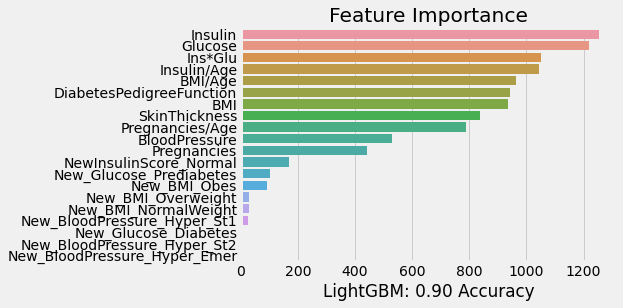

In [43]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('LightGBM: 0.90 Accuracy')
plt.title("Feature Importance")
plt.show()

In [44]:
# Checking Overfitting
log_model = LogisticRegression().fit(X,y)
y_pred = log_model.predict(X)
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.7936925098554534
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       494
           1       0.77      0.59      0.67       267

    accuracy                           0.79       761
   macro avg       0.79      0.75      0.76       761
weighted avg       0.79      0.79      0.79       761



<div class="alert alert-warning" role="alert" style="margin-top: 20px">

<h1>REPORT</h1>

<p><strong>The aim of this study</strong> was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. Here the steps;</p>
<p><strong>Exploratory Data Analysis:</strong>  The data set&#39;s structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.</p>
<p><strong>Data Preprocessing section;</strong> The NaN values missing observations were filled with the median values of whether each variable was diabetic or not. The outliers were determined by LOF and dropped. </p>
<p><strong>In model building;</strong> first, the base model was create and the test results were checked. Then categorical variables were edited and new features were added to the model.</p>
<p><strong>During Model Building;</strong> Logistic Regression, KNN, CART, Random Forests, GBM, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. </p>
<p><strong>According to test results;</strong> GBM, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.</p>
<p><strong>The model with the highest score after Hyper Parameter optimization was LGBM with 0.90 cross validation score</strong></p>



</div>